In [13]:
import glob 
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# img_dir='/Users/yeshwanth/Documents/DL/project1/part-1/sara_Yeshwanth'
img_dir="train"
valid_dir="valid"
from sklearn.preprocessing import StandardScaler
data_dir = pathlib.Path(img_dir).with_suffix('')



In [14]:
class DeepLearning:
    def __init__(self,batch_size=32,height=180,width=180,epochs=15):
        self.batch_size=batch_size
        self.height=height
        self.width=width
        self.epochs=epochs
    def getTrainAndvalidationDataSet(self,data_dir,valid_dir,img_height,img_width,batch_size):
        train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        # validation_split=0.01,
        # subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
        
        val_ds = tf.keras.utils.image_dataset_from_directory(
        valid_dir,
        # validation_split=0.01,
        # subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
        return train_ds,val_ds
    def getStates(self,train_ds):
      class_names = train_ds.class_names
      return class_names
    def createModel(self,num_classes):
        model = Sequential([
        layers.Rescaling(1./255, input_shape=(self.height, self.width, 3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
        ])
    
        return model
    def compileModel(self,model,train_ds,val_ds):
        model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        
        history = model.fit(
                train_ds,
                validation_data=val_ds,
                epochs=self.epochs
        )
                
        model.save("dlTrained_model.h5")
        return history
    def plotgraph(self,history):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs_range = range(self.epochs)

        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.show()
        
    def train(self,data_dir,valid_dir):
        train_ds,val_ds=self.getTrainAndvalidationDataSet(data_dir,valid_dir,self.height,self.width,32)
        class_names=self.getStates(train_ds)
        print(class_names)
        numberOfClasses = len(class_names)
        model=self.createModel(numberOfClasses)
        history=self.compileModel(model,train_ds,val_ds)
        loss, accuracy = model.evaluate(val_ds)
        print("Test Accuracy:", accuracy)
        print("Test Loss:", loss)
        self.plotgraph(history)
        






Found 7213 files belonging to 11 classes.
Found 1543 files belonging to 11 classes.
['creamy_paste', 'diced', 'floured', 'grated', 'juiced', 'jullienne', 'mixed', 'other', 'peeled', 'sliced', 'whole']
Epoch 1/15
226/226 [==============================] - 83s 365ms/step - loss: 2.2177 - accuracy: 0.1958 - val_loss: 2.1188 - val_accuracy: 0.2378
Epoch 2/15
226/226 [==============================] - 76s 334ms/step - loss: 1.9879 - accuracy: 0.2943 - val_loss: 1.9689 - val_accuracy: 0.3156
Epoch 3/15
226/226 [==============================] - 75s 330ms/step - loss: 1.7408 - accuracy: 0.3941 - val_loss: 1.9124 - val_accuracy: 0.3461
Epoch 4/15
226/226 [==============================] - 73s 322ms/step - loss: 1.3560 - accuracy: 0.5336 - val_loss: 2.1526 - val_accuracy: 0.3312
Epoch 5/15
226/226 [==============================] - 73s 320ms/step - loss: 0.8886 - accuracy: 0.6986 - val_loss: 2.5924 - val_accuracy: 0.3156
Epoch 6/15
226/226 [==============================] - 71s 315ms/step - los

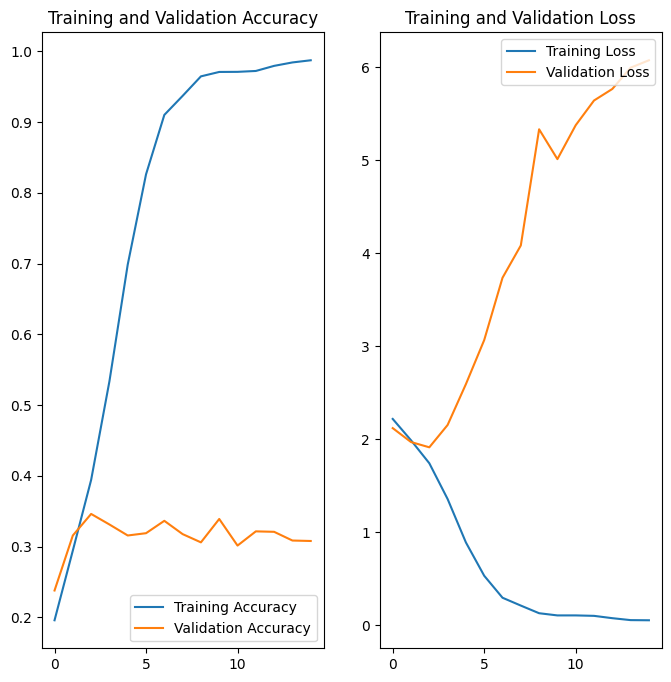

In [15]:
s=DeepLearning()
s.train(data_dir,valid_dir)